In [ ]:
!pip install pandas-profiling xgboost gradio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [ ]:
!wget https://github.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/raw/main/Loan_Prediction.zip

In [ ]:
!unzip /content/Loan_Prediction.zip

# Demographic data (traindemographics.csv)

In [ ]:
train_demo = pd.read_csv("/content/traindemographics.csv")
train_demo.head()

In [ ]:
train_demo.dtypes

In [ ]:
train_demo[train_demo['customerid'].duplicated(keep=False)].sort_values('customerid')

In [ ]:
train_demo = train_demo.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [ ]:
train_demo['birthdate'] = pd.to_datetime(train_demo['birthdate'])

train_demo["birthdate_year"] = pd.to_datetime(train_demo["birthdate"]).dt.year
train_demo["birthdate_month"] = pd.to_datetime(train_demo["birthdate"]).dt.month
train_demo["birthdate_day"] = pd.to_datetime(train_demo["birthdate"]).dt.day
train_demo.dtypes

In [ ]:
train_demo['bank_account_type'].value_counts()

In [ ]:
encoder = LabelEncoder()
train_demo['bank_account_type'] = encoder.fit_transform(train_demo['bank_account_type'])
train_demo[['bank_account_type']]

In [ ]:

_df_0['bank_account_type'].plot(kind='hist', bins=20, title='bank_account_type')
plt.gca().spines[['top', 'right',]].set_visible(False)

Based off of the graph. We can see that Savings is represented by '2', Other is represented by '1' and Current is represented by 0

In [ ]:
train_demo['longitude_gps'].describe()


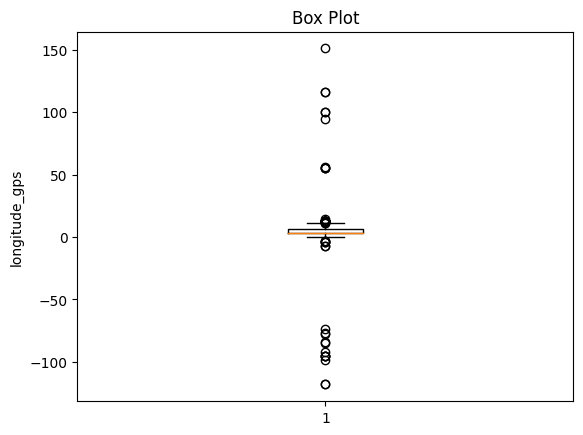

In [ ]:
train_demo['longitude_gps'] = train_demo['longitude_gps'].astype(float)
plt.boxplot(train_demo['longitude_gps'])
plt.title('Box Plot')
plt.ylabel('longitude_gps')
plt.show()

In [ ]:
# Define the threshold for outliers (e.g., 3 standard deviations away from the mean)
threshold = 3 * std_dev

The Box plot shows the column has many outliers and they can be replaced with zero

# Performance data (trainperf.csv)

This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict if whether this loan would default given all previous loans and demographics of a customer

In [ ]:
train_perf = pd.read_csv('/content/trainperf.csv')
train_perf.head()

# Previous loans data (trainprevloans.csv)

This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

In [ ]:
train_prevloans = pd.read_csv('/content/trainprevloans.csv')
train_prevloans.head()